In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from hurst import compute_Hc
from dfa import dfa

In [3]:
data = pd.read_csv("intern_dataset.csv")
data.head()

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912000 entries, 0 to 911999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Time     912000 non-null  object 
 1   Signal1  912000 non-null  float64
 2   Signal2  912000 non-null  float64
 3   Label    912000 non-null  object 
dtypes: float64(2), object(2)
memory usage: 27.8+ MB


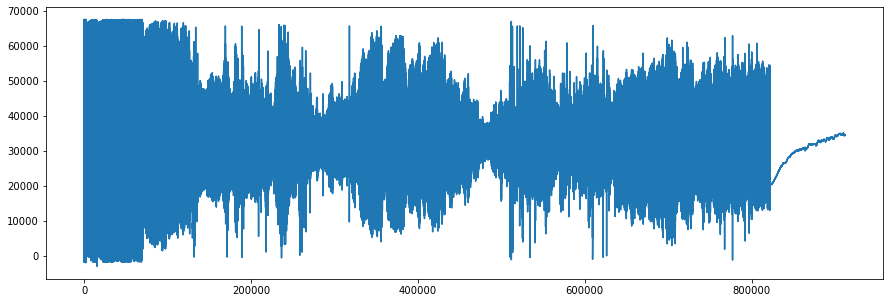

In [5]:
data["Signal1"].plot(figsize=(15,5))
plt.show()

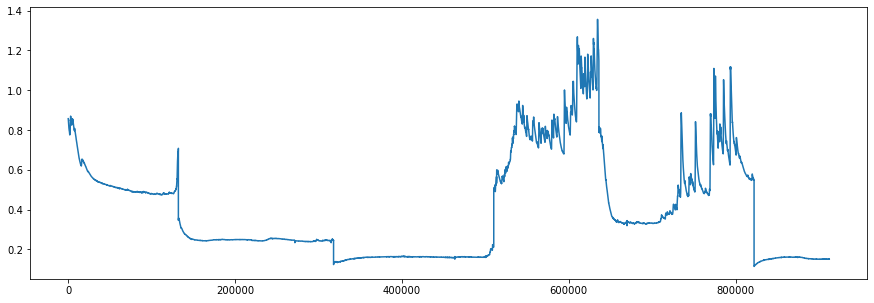

In [6]:
data["Signal2"].plot(figsize=(15,5))
plt.show()

In [7]:
a_class = data[data["Label"]=="A"]
a_class.set_index("Time",inplace = True)
b_class = data[data["Label"]=="B"]
b_class.set_index("Time",inplace = True)
c_class = data[data["Label"]=="C"]
c_class.set_index("Time",inplace = True)

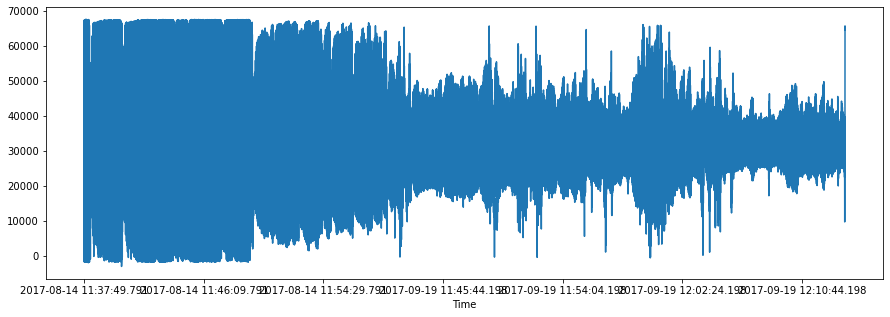

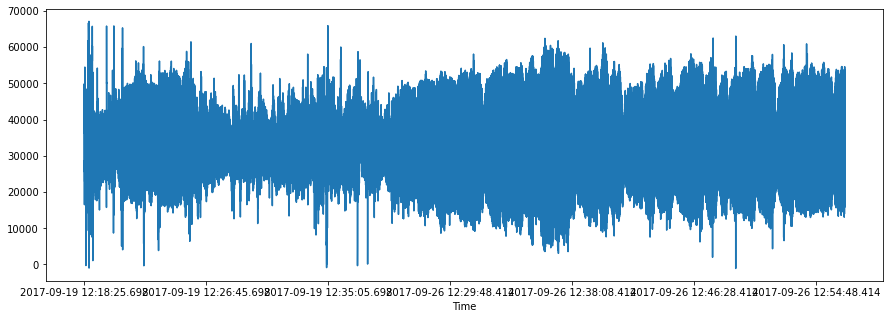

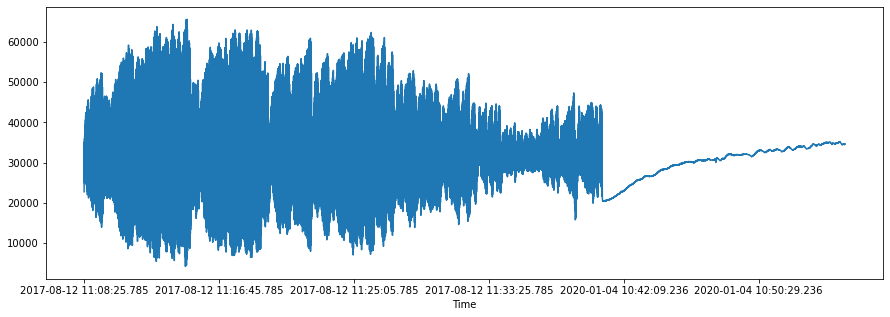

In [8]:
a_class["Signal1"].plot(figsize=(15,5))
plt.show()
b_class["Signal1"].plot(figsize=(15,5))
plt.show()
c_class["Signal1"].plot(figsize=(15,5))
plt.show()

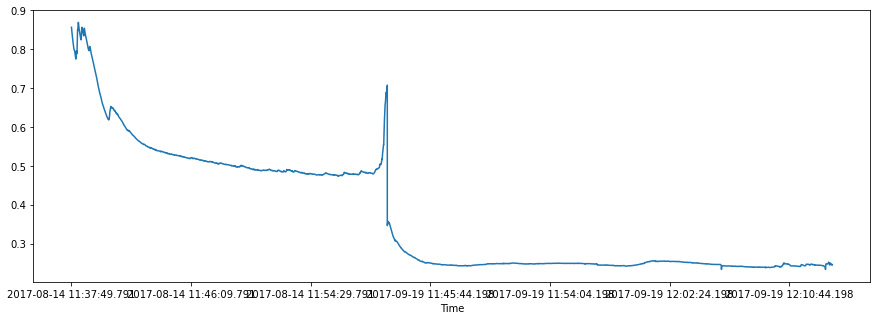

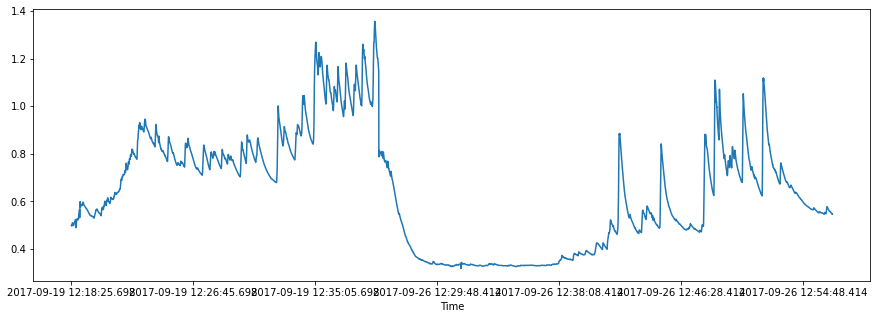

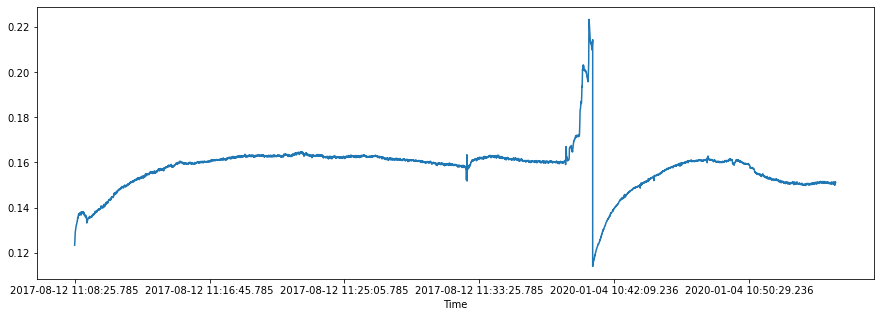

In [9]:
a_class["Signal2"].plot(figsize=(15,5))
plt.show()
b_class["Signal2"].plot(figsize=(15,5))
plt.show()
c_class["Signal2"].plot(figsize=(15,5))
plt.show()

# Hurst Exponent by R/S analysis

### The package used here was can be following the link: - 
https://github.com/Mottl/hurst

##### The Hurst exponent is referred to as the "index of dependence" or "index of long-range dependence".
Hurst exponent is calculated by plotting the rescaled range against the time interval on a log-log graph. The slope value of the straight line fitting the graph is the value of Hurst Exponent.

In R/S analysis, the time series is divided into smaller number of intervals and then rescaled range is calculated for each of these intervals.
Firstly, the accumulated standard deviation is calculated.
The ratio of extreme differnce of each interval, called as Range(R) of that interval and the standard deviation(S) follows the given equation: - 

\begin{equation}
\frac{R}{S} = cr^H
\end{equation}

\begin{equation}
log(\frac{R}{S}) = log(c) + Hlog(r)
\end{equation}

##### The fractal dimension is calculated as D = 2 - H

Hurst exponent between 0 - <0.5 signifies high volatility and anti correlation.

Hurst exponent 0.5 signifies total randomness and cannot be predicted.

Hurst exponent >0.5 - 1 signifies correlation and the highs will be most likely followed by highs and same goes for the lows.


The Fractal dimension for Signal1 in class A is 1.9927536110629263


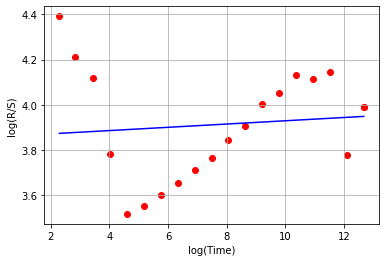

The Fractal dimension for Signal1 in class B is 1.97044935996485


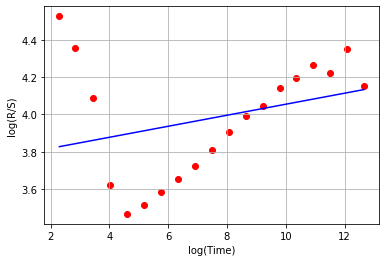

The Fractal dimension for Signal1 in class C is 1.868491438041839


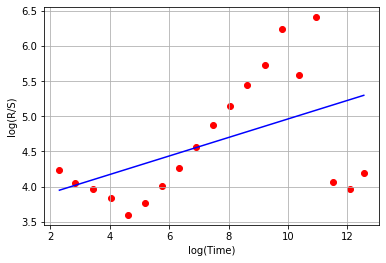

In [11]:
H, c, val = compute_Hc(a_class["Signal1"])
print("The Fractal dimension for Signal1 in class A is",2 - H)
axes = plt.subplots()[1]
axes.scatter(np.log(val[0]), np.log(val[1]), color="red")
axes.plot(np.log(val[0]), np.log(c)+H*np.log(val[0]), color="blue")
axes.set_xlabel('log(Time)')
axes.set_ylabel('log(R/S)')
axes.grid(True)
plt.show()

H, c, val = compute_Hc(b_class["Signal1"])
print("The Fractal dimension for Signal1 in class B is",2 - H)
axes = plt.subplots()[1]
axes.scatter(np.log(val[0]), np.log(val[1]), color="red")
axes.plot(np.log(val[0]), np.log(c)+H*np.log(val[0]), color="blue")
axes.set_xlabel('log(Time)')
axes.set_ylabel('log(R/S)')
axes.grid(True)
plt.show()

H, c, val = compute_Hc(c_class["Signal1"])
print("The Fractal dimension for Signal1 in class C is",2 - H)
axes = plt.subplots()[1]
axes.scatter(np.log(val[0]), np.log(val[1]), color="red")
axes.plot(np.log(val[0]), np.log(c)+H*np.log(val[0]), color="blue")
axes.set_xlabel('log(Time)')
axes.set_ylabel('log(R/S)')
axes.grid(True)
plt.show()

Here, Class A and B appars to be highly anti correlated and class C is somewhere unpredictable compared to other classes. 

The Fractal dimension for Signal2 in class A is 1.7017957000741204


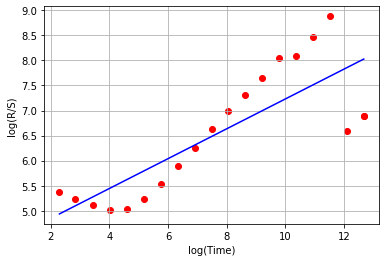

The Fractal dimension for Signal2 in class B is 1.839503422279263


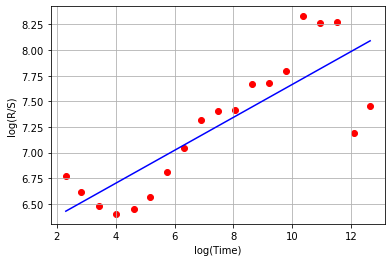

The Fractal dimension for Signal2 in class C is 1.6352736200509255


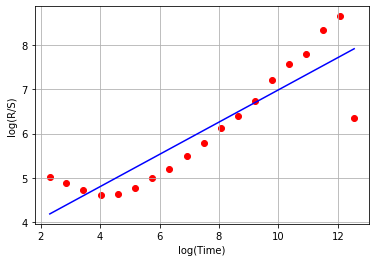

In [12]:
H, c, val = compute_Hc(a_class["Signal2"])
print("The Fractal dimension for Signal2 in class A is",2 - H)
axes = plt.subplots()[1]
axes.scatter(np.log(val[0]), np.log(val[1]), color="red")
axes.plot(np.log(val[0]), np.log(c)+H*np.log(val[0]), color="blue")
axes.set_xlabel('log(Time)')
axes.set_ylabel('log(R/S)')
axes.grid(True)
plt.show()

H, c, val = compute_Hc(b_class["Signal2"])
print("The Fractal dimension for Signal2 in class B is",2 - H)
axes = plt.subplots()[1]
axes.scatter(np.log(val[0]), np.log(val[1]), color="red")
axes.plot(np.log(val[0]), np.log(c)+H*np.log(val[0]), color="blue")
axes.set_xlabel('log(Time)')
axes.set_ylabel('log(R/S)')
axes.grid(True)
plt.show()

H, c, val = compute_Hc(c_class["Signal2"])
print("The Fractal dimension for Signal2 in class C is",2 - H)
axes = plt.subplots()[1]
axes.scatter(np.log(val[0]), np.log(val[1]), color="red")
axes.plot(np.log(val[0]), np.log(c)+H*np.log(val[0]), color="blue")
axes.set_xlabel('log(Time)')
axes.set_ylabel('log(R/S)')
axes.grid(True)
plt.show()

Comparing graphs, class B looks to be more predictable as the Hurst exponent appears to be a best fit.

Class C here is also more unpredictable.

# DFA

### The package used here was can be following the link: - 
https://github.com/dokato/dfa

##### Detrended fluctuation analysis (DFA) is a method for determining the statistical self-affinity of a signal. It is useful for analysing time series that appear to be long-memory processes.

In DFA summation of the values for given time series is calculated at first.
Then the time interval is divided into smaller time series and then their local trend is calculated by minimising the squared errors within each time window.
The root mean squared deviation from the trend is called as a fluctuation.

Then the graph of fluctuation is plotted against time interval on the log-log graph.

\begin{equation}
\alpha = \frac{log(Fluctuation)}{log(time)}
\end{equation}

##### For FBM

\begin{equation}
\alpha = H
\end{equation}
if alpha lies between 0 and 1

\begin{equation}
\alpha = H + 1 
\end{equation}
if alpha lies between 1 and 2


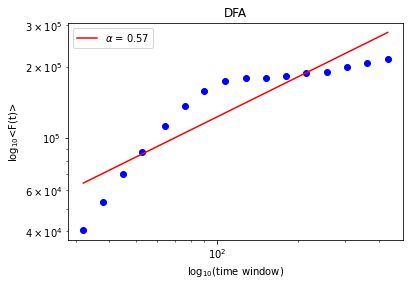

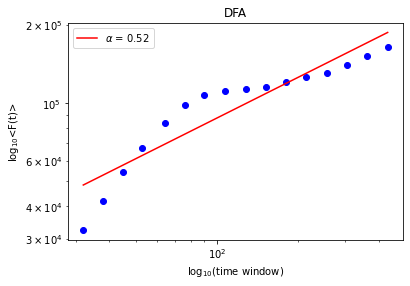

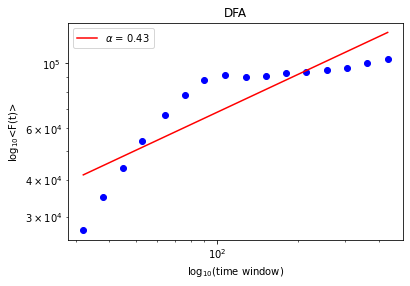

In [13]:
scales, fluct, alpha = dfa(a_class["Signal1"], show=True)
scales, fluct, alpha = dfa(b_class["Signal1"], show=True)
scales, fluct, alpha = dfa(c_class["Signal1"], show=True)

From above graphs, class A is more prdictable than classes B and C.

Class B is full of randomness

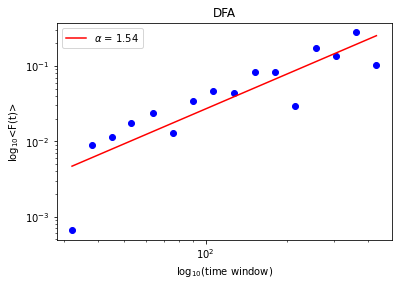

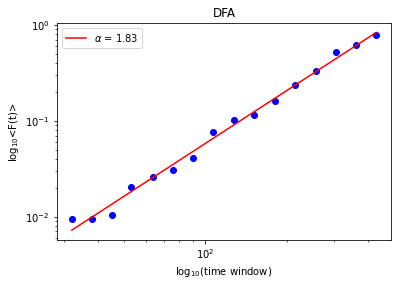

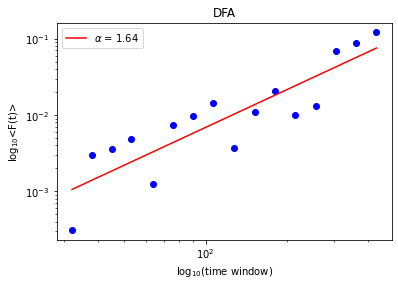

In [14]:
scales, fluct, alpha = dfa(a_class["Signal2"], show=True)
scales, fluct, alpha = dfa(b_class["Signal2"], show=True)
scales, fluct, alpha = dfa(c_class["Signal2"], show=True)

The graph of 'Signal2' for class B almost fits the alpha value which means it can be predicatble as,

\begin{equation}
H = \alpha - 1
\end{equation}

\begin{equation}
H = 1.83 - 1 = 0.83
\end{equation}

which means it is correlated

Value of H for class A is 0.54 which also show randomness

Value of H for class B is 0.64 which is less random

###### All the outcomes from above analysis shows that class B is most predictable.
###### Class A is a bit complex but class C is the most complex class compared to the other classes